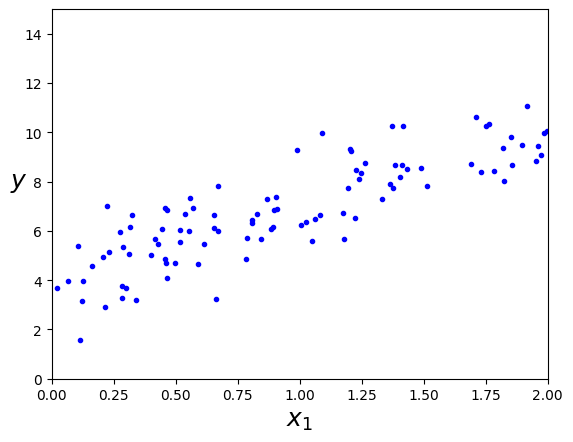

[[3.97624832]
 [3.05826832]]
[[ 3.97624832]
 [10.09278496]]


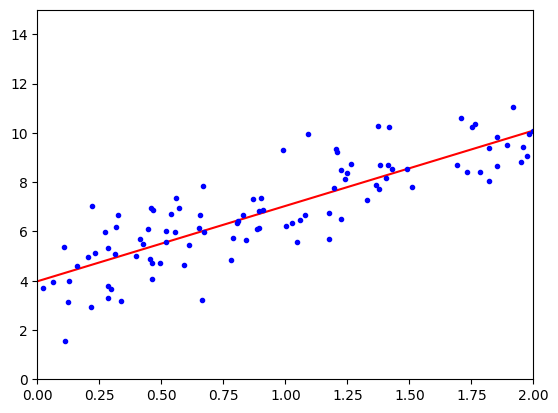

In [6]:
#*************************************************************************
# TRAINING MODELS
#*************************************************************************
# 1. Linear Regression
# 2. Decision Trees
# 3. Random Forest
# 4. Support Vector Machines
# 5. Neural Networks

#*************************************************************************
#                       1. LINEAR REGRESSION
#*************************************************************************
# Linear regression is a very simple approach for supervised learning. It assumes that the output is a linear combination of the input features.
# Two ways to train it:
# 1. Direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set (Normal Equation)
# 2. Using iterative optimization approach called Gradient Descent that gradually tweaks the model parameters to minimize the cost function over the training set.


# The normal equation

# theta = (X^T . X)^-1 . X^T . y
# theta is the value of theta that minimizes the cost function
# y is the vector of target values containing y(1) to y(m)

# Generate some linear-looking data to test this equation
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the data
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Computing theta using the normal equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

# Making predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)

# Plot the model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [7]:
# Linear regression using Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

# The function uses the pseudoinverse of X (specifically the Moore-Penrose inverse) to compute the theta value that minimizes the cost function.
# Both the Normal Equation and the SVD get very slow with big number of features (100k +)
# But linear with the amount of instances.



[3.97624832] [[3.05826832]]
[[ 3.97624832]
 [10.09278496]]


In [10]:
# Gradient Descent
# Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems.
# The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.
# Similar to being lost in the mountains and trying to find the lowest point by taking small steps in the steepest direction downhill.

# Two main challenges with GD:
# 1. If the random initialization starts the algorithm on the left, it will converge to a local minimum, which is not as good as the global minimum.
# 2. If the random initialization starts the algorithm on the right, it will take a long time to cross the plateau.

# MSE is a convex function, so there are no local minima, just one global minimum.
# It is also a continuous function with a slope that never changes abruptly.
# These two facts have a great impact on Gradient Descent: it is guaranteed to approach arbitrarily close to the global minimum (if the learning rate is not too high and the algorithm is given enough time).

# Remember to scale the variables. If one is much smaller, the algorithm will not consider it as important as the other one. And it will take a long time to converge.

# Batch Gradient Descent
# Computes the gradient of the cost function with regards to each model parameter over the full training set X, at each step (partial derivative).
# It uses the whole training set at every step, which makes it very slow on large training sets.
# However, it scales well with the number of features.

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

# And the result
print(theta)

# To find a good learning rate you can use grid search. But you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.
# To set the number of iterations you can set a very large number of iterations but interrupt the algorithm when the gradient vector becomes tiny (when its norm becomes smaller than a tiny number epsilon).



[[3.97624832]
 [3.05826832]]


In [13]:
# Stochastic Gradient Descent
# Batch Gradient Descent uses the whole training set to compute the gradients at every step, which makes it very slow.
# Stochastic Gradient Descent picks a random instance in the training set at every step (so the cost function will jump up and down)
# Final parameters are good but not optimal

# "Simulated annealing" is a way to reduce the learning rate gradually.
# The function that determines the learning rate at each iteration is called the "learning schedule".

n_epochs = 50       # we iterate by rounds of "m" iterations by convention. Each round = "epoch"
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
# And the result
print(theta)

# Batch Gradient Descent interated 1000 times. Stochastic Gradient Descent iterated 50 times.

# It can be useful to shuffle the instances of the training set. This will ensure that all instances are used in each epoch, but in a random order.

# Scikit-Learn has a function that does all this for you.
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)


[[3.93134784]
 [3.00997458]]
[3.97010766] [3.04460819]


In [ ]:
# Mini-batch Gradient Descent
# At each step, it computes the gradients on small random sets of instances called mini-batches.
# The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.
# It is less erratic than Stochastic GD, but it may be harder to escape from local minima.


# Summary of algorithms for Linear Regression
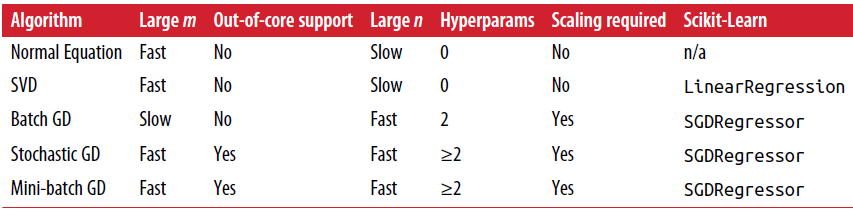

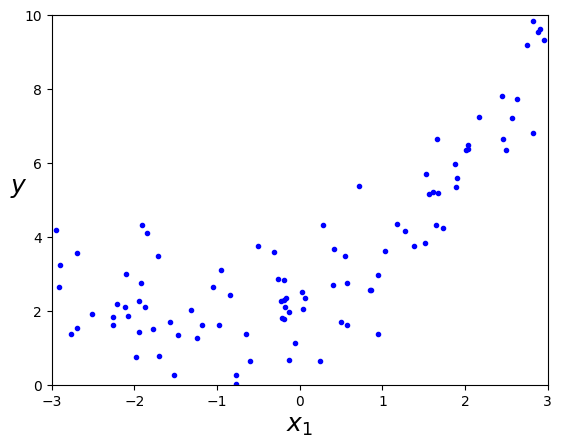

[-0.18016124]
[-0.18016124  0.03245807]
[2.00881828] [[0.99791403 0.48381808]]


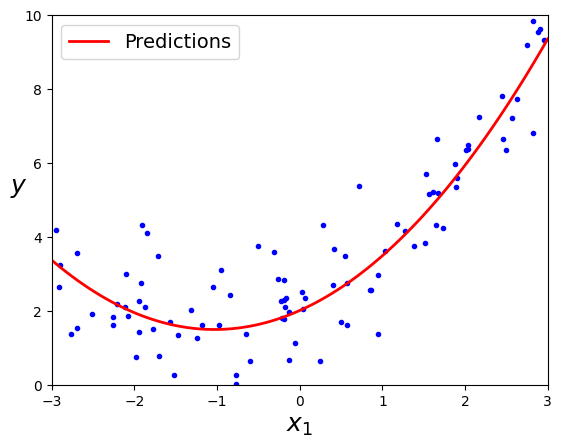

In [18]:
#*************************************************************************
# Polynomial Regression
#*************************************************************************
# Linear regression can be used to fit linear models to nonlinear data.
# A simple way to do this is to add powers of each feature as new features.

# Generate some nonlinear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Plot the data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# A linear model cannot fit this data properly.

# Adding the square of each feature in the training set as new features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

# Now we can fit a LinearRegression model to this extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

# Plot the model's predictions
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# PolynomialFeatures also adds all combinations of features up to the given degree. For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the features a^2, a^3, b^2, b^3, but also the combinations ab, a^2b, ab^2.

# We could also use a higher degree of polynomial to fit the data better. But be careful, the model will be more complex and more likely to overfit the data.

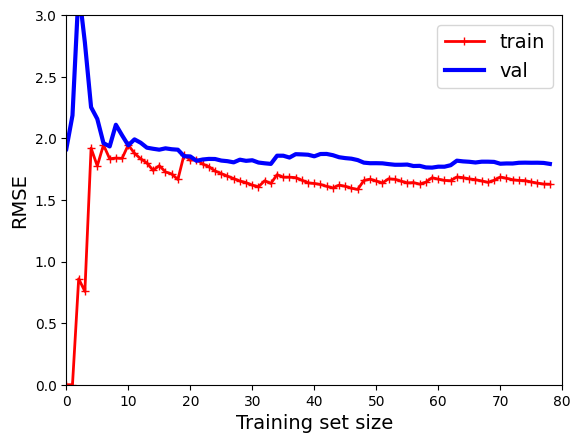

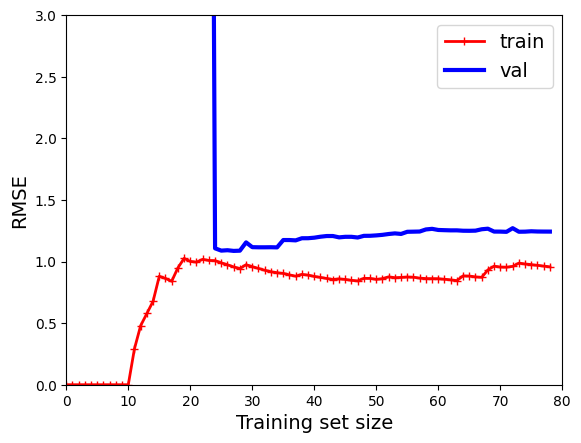

In [20]:
# Which polynomial degree to use? How to detect overfitting? Cross-validation. If the model performs well on the training data but poorly on the validation data, then it is overfitting. If it performs poorly on both, then it is underfitting.
# Another way: Learning curves.

#*************************************************************************
# Learning Curves
#*************************************************************************
# These are plots of the model's performance on the training set and the validation set as a function of the training set size (or the training iteration).
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

# Plot the learning curves of a plain Linear Regression model
lin_reg = LinearRegression()
plt.axis([0, 80, 0, 3])
plot_learning_curves(lin_reg, X, y)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

# Explanation:
# When there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero.
# But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all.
# So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error much better or worse.
# When the model is trained on very few instances, it is incapable of generalizing properly, which is why the validation error is initially quite big.
# Then as the model is shown more instances, it learns and thus the validation error slowly goes down.
# However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

# These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high.

# Now let's look at the learning curves of a 10th-degree polynomial model on the same data.
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plt.axis([0, 80, 0, 3])
plot_learning_curves(polynomial_regression, X, y)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

# Explanation:
# These learning curves look a bit different. The error on the training data is much lower than with the Linear Regression model.
# There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model.
# However, if you used a much larger training set, the two curves would continue to get closer.


In [30]:
#*************************************************************************
# Regularized Linear Models
#*************************************************************************
# A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be to overfit the data.
# A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.
# For a linear model, regularization is typically achieved by constraining the weights of the model. Three different ways to do that:
# 1. Ridge Regression (L2 regularization)
# 2. Lasso Regression (L1 regularization)
# 3. Elastic Net (L1 and L2 regularization)

# 1. Ridge Regression
# Regularization term is added to the cost function. It is the sum of the squares of the weights multiplied by a hyperparameter alpha.
# The hyperparameter alpha controls how much you want to regularize the model. If alpha = 0, then Ridge Regression is just Linear Regression.
# If alpha is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.
# Se agrega un termino a la funcion de costo que fuerza al algoritmo a mantener los pesos lo mas pequeños posibles

# Ridge Regression cost function
# J(theta) = MSE(theta) + alpha * 1/2 * sum(theta^2)
# Important: scale the data!

# Higher alpha means flatter line (reduces variance but increases bias)

# Ridge Regression with Scikit-Learn
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))   # 4.905

# Using Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l2")    # l2 is the same as Ridge
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))    # 4.887


# 2. Lasso Regression
# (Least Absolute Shrinkage and Selection Operator Regression). Similar to the other one.

# Lasso Regression cost function
# J(theta) = MSE(theta) + alpha * sum(|theta|)

# Lasso Regression tends to eliminate the weights of the least important features (sets them to zero). 

# Lasso Regression with Scikit-Learn
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print(lasso_reg.predict([[1.5]]))   # 4.857


# 3. Elastic Net
# A middle ground between Ridge Regression and Lasso Regression.
# The regularization term is a mix of both Ridge and Lasso's regularization terms, controlled by the mix ratio r.
# When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

# Elastic Net cost function
# J(theta) = MSE(theta) + r * alpha * sum(|theta|) + (1-r)/2 * alpha * sum(theta^2)

# Elastic Net with Scikit-Learn
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)   # l1_ratio is the mix ratio r
elastic_net.fit(X, y)
print(elastic_net.predict([[1.5]]))   # 4.857


# Summary: should we use a plain Linear Regression, Ridge, Lasso, or Elastic Net?
# It is almost always preferable to have some regularization, so generally you should avoid plain Linear Regression.
# Ridge is a good default. If you suspect that only a few features are useful, you should prefer Lasso or Elastic Net.
# In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.


[[4.90483776]]
[4.89476179]
[4.85648154]
[4.85652981]


In [ ]:
# Early Stopping
# A different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum.

# With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not.
# One solution is to stop only after the validation error has been above the minimum for some time.

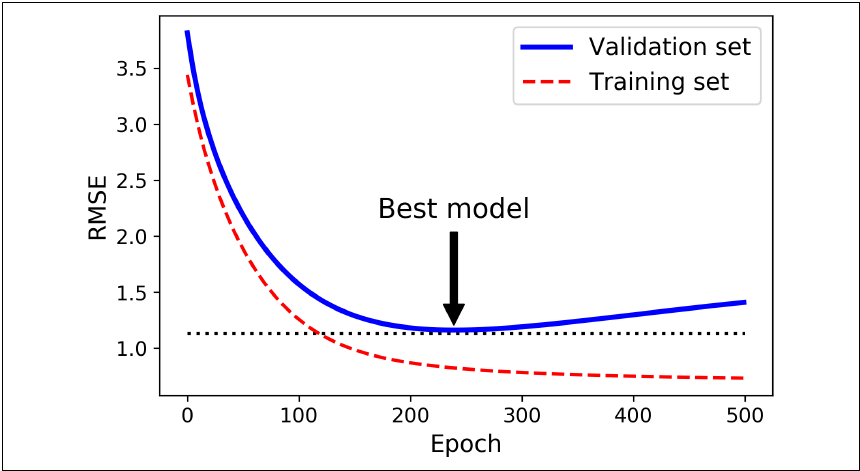

In [ ]:
### NO FUNCIONA MUY BIEN. HAY ERRORES ###

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# Prepare the data
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
        penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)   # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [ ]:
#*************************************************************************
# Logistic Regression
#*************************************************************************
# Used to estimate the probability that an instance belongs to a particular class.
# If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled as "1"), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled as "0").
# This makes it a binary classifier.

# Estimating probabilities
# The logistic function (or sigmoid function) outputs a number between 0 and 1.
# sigma(t) = 1 / (1 + exp(-t))

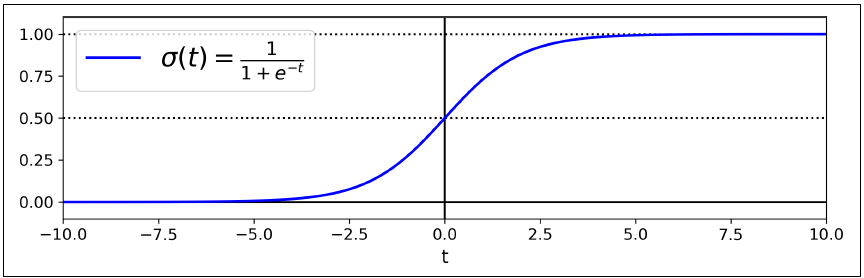

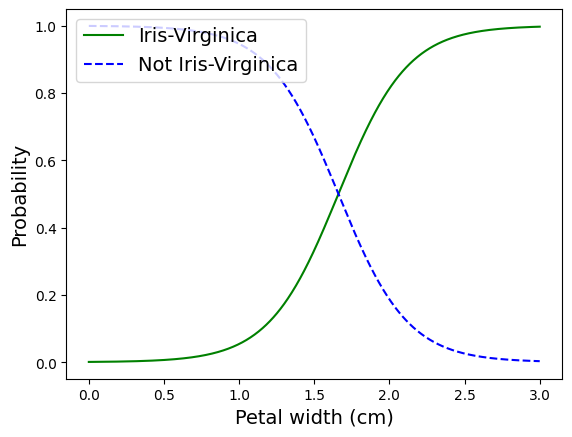

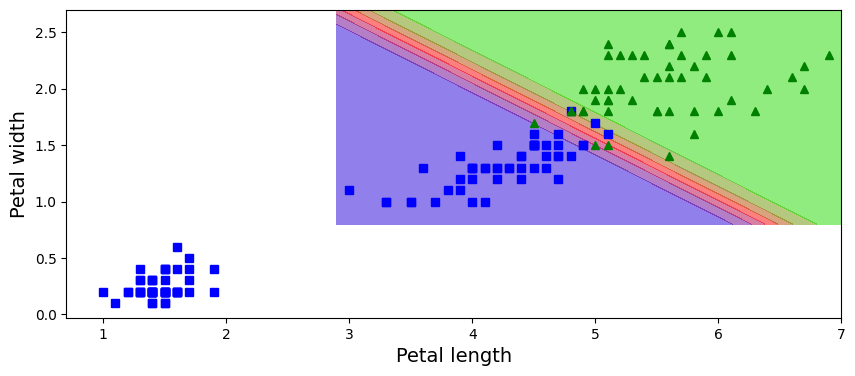

In [54]:
# Training and cost function

# The cost function is:
# J(theta) = -1/m * sum(y(i) * log(p(i)) + (1 - y(i)) * log(1 - p(i)))

# There is no known closed-form equation to compute the value of theta that minimizes this cost function.
# But the cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too high and you wait long enough).
# Use partial derivatives!

# Example: "Iris dataset"
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 3:]   # petal width
y = (iris["target"] == 2).astype(int)   # 1 if Iris-Virginica, else 0

# Training the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Let's look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.show()

# The petal width of Iris-Virginica flowers (positive class) ranges from 1.4 to 2.5 cm, while the other iris flowers (negative class) generally have a smaller petal width, ranging from 0.1 to 1.8 cm.
# There is an overlap. There the model is uncertain. There is a decision boundary at around 1.6 cm where both probabilities are equal to 50%.
log_reg.predict([[1.7], [1.5]])     # 1 and 0, respectively

# Same dataset but now using two variables: petal width and length
X = iris["data"][:, (2, 3)]   # petal length, petal width
y = (iris["target"] == 2).astype(int)   # 1 if Iris-Virginica, else 0

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

# Plot the decision boundary
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.contourf(x0, x1, zz, cmap=plt.cm.brg, alpha=0.5)
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.show()

# Like other linear models, Logistic Regression models can be regularized using l1 or l2 penalties. Scikit-Learn actually adds an l2 penalty by default.



[2]
[[6.21626372e-07 5.73689802e-02 9.42630398e-01]]


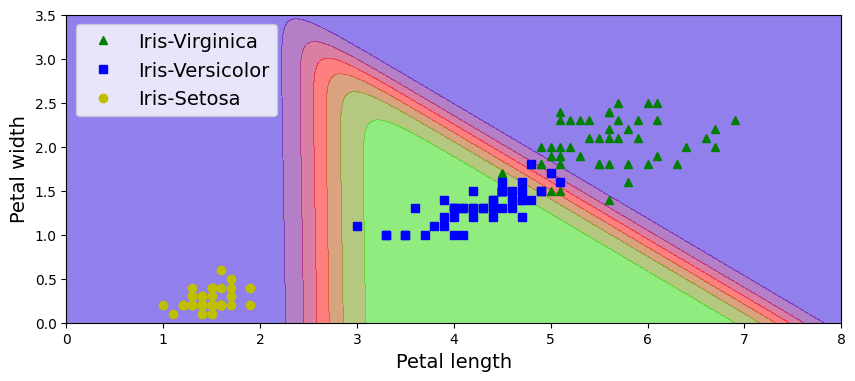

In [ ]:
#*************************************************************************
# Softmax Regression
#*************************************************************************
# Used to classify instances into multiple classes, not just two.
# It is called "Multinomial Logistic Regression" or "Softmax Regression".
# When given an instance x, the Softmax Regression model first computes a score sk(x) for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores.

# The Softmax score for class k
# s_k(x) = theta_k^T . x

# The Softmax function
# p_k = sigma(s(x))_k = exp(s_k(x)) / sum(exp(s_j(x)) for j=1 to K)

# K is the number of classes
# s(x) is a vector containing the scores of each class for the instance x
# sigma(s(x))_k is the estimated probability that the instance x belongs to class k given the scores of each class for that instance.

# The Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score), so it is a multiclass classifier.

# Training
# The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes).
# The cost function is the cross entropy, which penalizes the model when it estimates a low probability for the target class.
# Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes.

# Cross entropy cost function
# J(theta) = -1/m * sum(sum(y(i)_k * log(p(i)_k)))
# y(i)_k is the target probability that the ith instance belongs to class k. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.
# p(i)_k is the estimated probability that the ith instance belongs to class k.

# When there are two classes ( K = 2 ), the cost function is equivalent to the Logistic Regression's cost function

# Scikit-Learn's LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression.
# You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver.
X = iris["data"][:, (2, 3)]   # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

# I will ask the model which type of iris is a flower with petal length 5 cm and width 2 cm
print(softmax_reg.predict([[5, 2]]))   # 2, so it is an Iris-Virginica
print(softmax_reg.predict_proba([[5, 2]]))   # [6.38014896e-07, 0.05749, 0.94250]
# The model estimates that there is a 95% probability that the flower is an Iris-Virginica, 5% that it is an Iris-Versicolor, and almost 0% that it is an Iris-Setosa.

# Plot the decision boundaries
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)
plt.figure(figsize=(10, 4))
plt.contourf(x0, x1, zz, cmap=plt.cm.brg, alpha=0.5)
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

